In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df=pd.read_csv("C:\\Users\\asus\\Desktop\\BDDA TEXT\\CAR\\train.csv",low_memory=False)

In [3]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [10]:
df['Model'].value_counts()

Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64

<AxesSubplot:xlabel='Model', ylabel='count'>

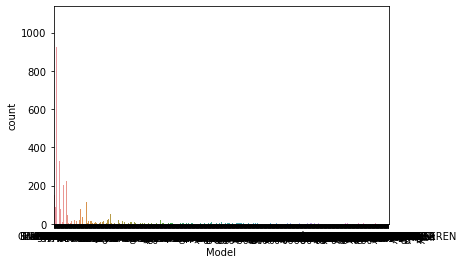

In [11]:
sns.countplot(x="Model", data=df)

Text(0.5, 1.0, 'Number of Models ')

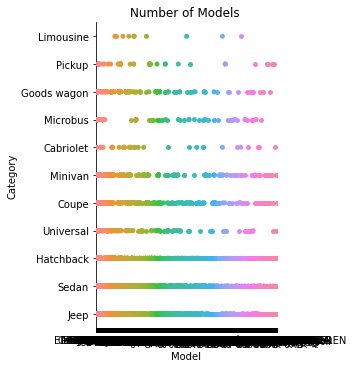

In [12]:
sns.catplot(x="Model", y="Category", data=df)
plt.title("Number of Models ")

In [13]:
cat_columns=['Manufacturer','Model','Category','Leather interior','Fuel type','Gear box type','Color','Wheel']
num_columns=['Prod. year','Cylinders']

In [14]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [15]:
num_data = df[num_columns]
num_data.head()
print("\n-----\n")
num_data.shape    
print("\n-----\n")   
num_data.columns

,Prod. year,Cylinders
0,2010,6.0
1,2011,6.0
2,2006,4.0
3,2011,4.0
4,2014,4.0



-----



(19237, 2)


-----



Index(['Prod. year', 'Cylinders'], dtype='object')

In [16]:
ss= StandardScaler()

In [17]:
nc = ss.fit_transform(num_data.loc[:,num_columns])

In [18]:
nc.shape

(19237, 2)

In [19]:
nc = pd.DataFrame(nc, columns = num_columns)
nc.head(2)

,Prod. year,Cylinders
0,-0.161034,1.180937
1,0.015379,1.180937


In [20]:
nc['Manufacturer'] = df['Manufacturer']
nc['Model']=df['Model']
nc['Category'] = df['Category']
nc['Leather interior']=df['Leather interior']
nc['Fuel type']=df['Fuel type']
nc.shape

(19237, 7)

In [21]:
from sklearn.impute import SimpleImputer
Pipe=Pipeline(steps=[("simp_imputer",SimpleImputer(strategy='median')),("stand_scale",StandardScaler())])

In [22]:
Pipe.fit_transform(df[num_columns])

array([[-0.1610338 ,  1.1809372 ],
       [ 0.01537891,  1.1809372 ],
       [-0.86668466, -0.48586561],
       ...,
       [-0.1610338 , -0.48586561],
       [-0.69027195, -0.48586561],
       [ 0.19179163, -0.48586561]])

In [23]:
from sklearn.preprocessing import OneHotEncoder
nf=Pipeline(steps=[("simp_imputer",SimpleImputer(strategy='constant')),("one_hot_encoder",OneHotEncoder())])

In [24]:
nf.fit_transform(df[cat_columns])

<19237x1697 sparse matrix of type '<class 'numpy.float64'>'
	with 153896 stored elements in Compressed Sparse Row format>

In [25]:
ct = ColumnTransformer([('nc', Pipe, num_columns), ('cp', nf, cat_columns)])

In [26]:
ct.fit_transform(df)

<19237x1699 sparse matrix of type '<class 'numpy.float64'>'
	with 192370 stored elements in Compressed Sparse Row format>

In [27]:
y = df.pop('Model')
X = df

In [28]:
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,                   # Data features
                                                    y,                   # Target column
                                                    test_size = 0.2      # split-ratio
                                                    )

In [29]:
f"X_train shape: {X_train.shape}"    
print()
f"X_test.shape : {X_test.shape}"     
print()
f"y_train shape: {y_train.shape}"    
print()
f"y_test shape : {y_test.shape}"

'X_train shape: (15389, 17)'

'X_test.shape : (3848, 17)'

'y_train shape: (15389,)'

'y_test shape : (3848,)'

In [30]:
pt = Pipeline([ ('ct', ct),
              ('dt', DecisionTreeClassifier())])

In [31]:
y_test

18468            ML 550
8958              Civic
5387                 XF
4985            X-Trail
3190              Vento
              ...      
13069               HHR
9361     Sonata Limited
491          328 Xdrive
2886           Santa FE
18241             Jetta
Name: Model, Length: 3848, dtype: object

In [32]:
set_config(display='diagram')
pt

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc',
                                                  Pipeline(steps=[('simp_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stand_scale',
                                                                   StandardScaler())]),
                                                  ['Prod. year', 'Cylinders']),
                                                 ('cp',
                                                  Pipeline(steps=[('simp_imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Manufacturer', 'Model',
                                                   'Category',
                                                   'Leather interior',
                                                   'Fuel type', 'Gear box type',
                                                   'Color', 'Wheel'])])),
                ('dt', DecisionTreeClassifier())])

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve

In [34]:
pt.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(transformers=[('nc',
                                    Pipeline(steps=[('simp_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('stand_scale',
                                                     StandardScaler())]),
                                    ['Prod. year', 'Cylinders']),
                                   ('cp',
                                    Pipeline(steps=[('simp_imputer',
                                                     SimpleImputer(strategy='constant')),
                                                    ('one_hot_encoder',
                                                     OneHotEncoder())]),
                                    ['Manufacturer', 'Model', 'Category',
                                     'Leather interior', 'Fuel type',
                                     'Gear box type', 'Color', 'Wheel']

In [35]:
parameters = {
              'dt__max_depth': [4,10],
              'dt__min_impurity_decrease':[0,1],
              'dt__min_samples_leaf': [2,3],
              'dt__criterion': ["gini", "entropy"]
              }               